# NumPy = Numerical

Numpy is an important package for numerical cimputing in Python. Most computational packages numpy multidimensional array as the main structure to store and manipulate data.

Numpy is large topic. In this lecture, **we cover**:
- Fast vectorized array operations for data manipulation, cleaning, subsetting, filtering, transformation, and any other kinds of computation.
- Popular methods on array object like sorting, unique, and set operations.
- Efficient descriptive statistic, and summarizing data.
- Merging and joining togerther datasets
- Expressing conditional logic as array expression instead of loops
- Group-wise data manipulation (aggregration, transformation, function application).

In [1]:
import numpy as np

# The Numpy ndarray: A Multidimensional Array Object

## Creating `ndarray` - [N-dimensional array](https://docs.scipy.org/doc/numpy-1.13.0/reference/arrays.ndarray.html)

To create an array, use the **`array`** function. This function accept any sequence-like object and produces a new NumPy array containing the passed data

In [2]:
data1 = [1, 2, 3]
array1 = np.array(data1) # data passed in is a list
array1

array([1, 2, 3])

In [3]:
data2 = (1, 2, 3)
array2 = np.array(data2) # data passed in is a tuple
array2

array([1, 2, 3])

In [6]:
type(array2)

numpy.ndarray

Obviously, we can create a numpy array directly as follow:

In [8]:
array3 = np.array([5, 6, 7])
array3

array([5, 6, 7])

If we passed a nested sequences to the `array` function, a multidimensional array is created.

In [13]:
data4 = [[1,2,3], [4,5,6]]
array4 = np.array(data4)
array4

array([[1, 2, 3],
       [4, 5, 6]])

In [17]:
np.array([[1, 2], [3, 4, 5]])

array([list([1, 2]), list([3, 4, 5])], dtype=object)

We see the `data4` is a list of 2 elements where each element is a list of 3 elements. Thus, `array4` is a `2x3` array (or matrix). We can check the number of dimensions of an array and its shape using

In [18]:
array4.ndim # check number dimensions of array

2

In [21]:
array4.shape # numpy.ndarray.shape, return a tuple of array dimensions

(2, 3)

### Some useful functions for creating new special arrays

In [30]:
# numpy.zeros(shape, dtype=float, order='C')
np.zeros([2,3])

array([[0., 0., 0.],
       [0., 0., 0.]])

In [32]:
# numpy.ones(shape, dtype=None, order='C')
np.ones([2,3])

array([[1., 1., 1.],
       [1., 1., 1.]])

In [33]:
 # numpy.arrange([start, ]stop, [step, ]dtype=None)
np.arange(2,20)

array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19])

In [43]:
# numpy.eye(N, M=None, k=0, dtype=<class 'float'>, order='C')
# Return ndarray of shape (N,M). An array where all elements are equal to zero, 
# except for the `k-th` diagonal, whose values are equal to one.
np.eye(4, M=5, k=-1)

array([[0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0.]])

### Arithmetic with NumpyArray

When numerical data are stored in numpy arrays, we can perform batch operations on data (like matrix operations in math) without writing any loops. We call this feature vectorization. Any arithmetic operations between equal-size arrays applies the operation element-wise. For example, we have

In [44]:
my_list = [[1, 2, 3], [4, 5, 6]]

then, we want to create a new list where its elements are elements of `my_list` squared as:

In [45]:
[[i**2 for i in item] for item in my_list]

[[1, 4, 9], [16, 25, 36]]

Using numpy array and vectorization we can do the same but much simple as:

In [46]:
array = np.array(my_list)
array

array([[1, 2, 3],
       [4, 5, 6]])

In [47]:
array * array

array([[ 1,  4,  9],
       [16, 25, 36]])

In [48]:
array - array

array([[0, 0, 0],
       [0, 0, 0]])

In [50]:
array ** 3

array([[  1,   8,  27],
       [ 64, 125, 216]])

In [51]:
1 / array

array([[1.        , 0.5       , 0.33333333],
       [0.25      , 0.2       , 0.16666667]])

We can compare two arrays of the same shape element-wise. Th result is a boolean way.

In [52]:
arr_2 = np.array([[2, 4, 0], [5, 1, 9]])
arr_2

array([[2, 4, 0],
       [5, 1, 9]])

In [53]:
array

array([[1, 2, 3],
       [4, 5, 6]])

In [54]:
arr_2 > array

array([[ True,  True, False],
       [ True, False,  True]])

## Basic Indexing and Slicing 

For one dimensional numpy, slicing is similar to Python lists

In [55]:
arr = np.arange(100)
arr

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
       85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99])

In [56]:
arr[0]

0

In [57]:
arr[-2]

98

In [58]:
arr[:3]

array([0, 1, 2])

In [59]:
arr[-3:]

array([97, 98, 99])

In [60]:
arr[2:6]

array([2, 3, 4, 5])

We should notice that array slices are **views** on the original array. This means that the data is not copied, and any modification to the view will be reflected in the source array. For example:

In [61]:
arr_slice = arr[2:6]
arr_slice

array([2, 3, 4, 5])

In [62]:
arr_slice[0] = 99
arr_slice

array([99,  3,  4,  5])

In [63]:
arr

array([ 0,  1, 99,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
       85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99])

If we want a deep copy of a slice, we need to do it explicitly as:

In [65]:
arr_slice_copied = arr[-3:].copy()
arr_slice_copied

array([97, 98, 99])

In [67]:
arr_slice_copied[0] = 0
arr_slice_copied

array([ 0, 98, 99])

In [68]:
arr

array([ 0,  1, 99,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
       85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99])

For higher dimensional array, for example, 2-dimensional arrays, the elements at each index are no longer scalars but rather one-dimensional arrays.

In [69]:
arr_2d = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
arr_2d

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

We can select an individual element by two ways:

In [70]:
# Access recursively the element at row 1, column 1
arr_2d[1][1]

5

In [71]:
# Comma separated list
arr_2d[0, 2]

3

### Indexing with slices

In [72]:
arr_2d

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

In [73]:
# Return the first row
arr_2d[0]

array([1, 2, 3])

In [74]:
# Return the first two row
arr_2d[:2]

array([[1, 2, 3],
       [4, 5, 6]])

In [75]:
# Return the second column
arr_2d[:, 1]

array([2, 5, 8])

In [78]:
# Return the square supmatrix at the upper right corner
arr_2d[:2, -2:]

array([[2, 3],
       [5, 6]])

#### Remeber again, slice is a `view`. Modify a slice changes the original array. 

In [79]:
arr_2d

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

In [80]:
arr_2d[:2, :2] = 99
arr_2d

array([[99, 99,  3],
       [99, 99,  6],
       [ 7,  8,  9]])

## Comparision Operators 

In [83]:
array = np.arange(1, 7)
array

array([1, 2, 3, 4, 5, 6])

In [84]:
array > 3

array([False, False, False,  True,  True,  True])

In [85]:
array >= 3

array([False, False,  True,  True,  True,  True])

In [86]:
array == 3

array([False, False,  True, False, False, False])

In [87]:
array != 3

array([ True,  True, False,  True,  True,  True])

## Boolean Arrays 

In [89]:
a = np.array([[2, -7, 1], [-4, 3, 8], [5, 0, -6]])
a

array([[ 2, -7,  1],
       [-4,  3,  8],
       [ 5,  0, -6]])

In [90]:
# Which number is posible ? 
a > 0

array([[ True, False,  True],
       [False,  True,  True],
       [ True, False, False]])

In [91]:
# how many negative number ? 
(a < 0).sum()

3

In [92]:
# Are there any number equal to 0 ?
(a == 0).any()

True

In [93]:
# Are all value less than 8 ? 
(a < 8).all()

False

## Boolean Indexing 

In [95]:
a = np.arange(-2, 3)
a

array([-2, -1,  0,  1,  2])

In [96]:
# Boolean mask
a > 0

array([False, False, False,  True,  True])

In [97]:
# Pass the boolean mask to index
a[a > 0]

array([1, 2])

In [98]:
# Create a random 2 dimensional array
# numpy.random.randint(low, high=None, size=None, dtype='l')
# Return random integers from the "discrete uniform" distribution of the specified dtype 
# in the "half-open" [low, high). If high=None, then results are from [0, low)
b = np.random.randint(1, high=10, size=(3, 3))
b

array([[1, 6, 5],
       [8, 8, 8],
       [2, 5, 7]])

In [99]:
# Index with boolean mask
b[b <= 4]

array([1, 2])

In [100]:
# We can set value of an array with boolean mask
b[b==8] = 0
b

array([[1, 6, 5],
       [0, 0, 0],
       [2, 5, 7]])

In [102]:
# get index with where
a = np.random.randint(8, size=5)
a

array([5, 4, 6, 5, 6])

In [103]:
np.where(a > 4)

(array([0, 2, 3, 4]),)

## Fancy Indexing 

If we want to access elements at non consecutinuos index of a numpy array, we use fancy indexing. For example:

In [104]:
a = np.random.randint(0, high=9, size=10)
a

array([2, 1, 8, 6, 6, 3, 7, 8, 2, 5])

We retrieve elements at even indices of the above array as: 

In [105]:
a[[0, 2, 5, 6, 8]]

array([2, 8, 3, 7, 2])

Fancy indexing also works with multiple dimensions arrays:

In [112]:
b = np.arange(9).reshape(3, 3)
b

array([[0, 1, 2],
       [3, 4, 5],
       [6, 7, 8]])

To get the elements at specific locations, we pass in two tuples. The first one indicates the row indicies and the second one determines column indicies

In [114]:
# Get elements at the four corners of the array, the indicies of those position are
# (0, 0); (0, 2); (2, 0); (2, 2)
row_indicies = (0, 0, 2, 2)
column_indicies = (0, 2, 0, 2)
b[row_indicies, column_indicies]

array([0, 2, 6, 8])

We can combine fancy indexing with other indexing methods to get desired elements.

In [115]:
# Simple  + fancy
b[1, [0, 2]]

array([3, 5])

In [116]:
# Slicing + Fancy
b[[0, 2], -2:]

array([[1, 2],
       [7, 8]])

In [120]:
# Boolean + Fancy
b[[True, False, True]][:, [0, 2]]

array([[0, 2],
       [6, 8]])

We can create a new array by using fancy indexing

In [127]:
b

array([[0, 1, 2],
       [3, 4, 5],
       [6, 7, 8]])

In [128]:
b[[1, 0, 0, 1, 2, 2, 1]]

array([[3, 4, 5],
       [0, 1, 2],
       [0, 1, 2],
       [3, 4, 5],
       [6, 7, 8],
       [6, 7, 8],
       [3, 4, 5]])

We can modify data of array using fancy indexing

In [130]:
b[[0, 1], [2, 0]] = 99
b

array([[ 0,  1, 99],
       [99,  4,  5],
       [ 6,  7,  8]])

In [131]:
b[[0, 1, 1, 2, 0, 1], 1] = 0
b

array([[ 0,  0, 99],
       [99,  0,  5],
       [ 6,  0,  8]])

noi chung thi minh thay doan nay giong for, no ban chat la mot view voi cac objecy view, no se quet het cac object linking

In [132]:
a = np.arange(10)
a

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [133]:
np.where(a > 3)

(array([4, 5, 6, 7, 8, 9]),)

## Universal Function

### Array Arithmetic 

In [134]:
x = np.arange(5)
print(x)
print(x + 2)
print(x - 2)
print(x * 2)
print(x / 2)
print(x // 2)
print(x ** 2)
print(x % 2)

[0 1 2 3 4]
[2 3 4 5 6]
[-2 -1  0  1  2]
[0 2 4 6 8]
[0.  0.5 1.  1.5 2. ]
[0 0 1 1 2]
[ 0  1  4  9 16]
[0 1 0 1 0]


## Absolute value

In [135]:
x = np.array([-2, -1, 0, 1, 2])
print(x)
print(np.abs(x))

[-2 -1  0  1  2]
[2 1 0 1 2]


The numpy absolute function can work with complex numbers and return the magnitude of it.

In [136]:
x = np.array([-1 + 1j, 2 - 2j, 3 + 4j])
print(x)
print(np.abs(x))

[-1.+1.j  2.-2.j  3.+4.j]
[1.41421356 2.82842712 5.        ]


## Trigonometric functions

In [138]:
# numpy.linspace(start, stop, num=50, endpoint=True, retstep=False, dtype=None)
# Returns num evenly spaced samples, calculated over the interval [start, stop].
x = np.linspace(-2 * np.pi, 2 * np.pi, 5)
x

array([-6.28318531, -3.14159265,  0.        ,  3.14159265,  6.28318531])

In [139]:
y = np.sin(x)
y

array([ 2.4492936e-16, -1.2246468e-16,  0.0000000e+00,  1.2246468e-16,
       -2.4492936e-16])

In [141]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use("ggplot")

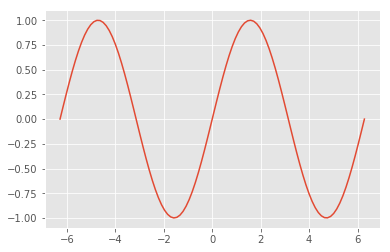

In [142]:
x = np.linspace(-2 * np.pi, 2 * np.pi, 100)
y = np.sin(x)
plt.plot(x, y)

## Exponents and logarithms

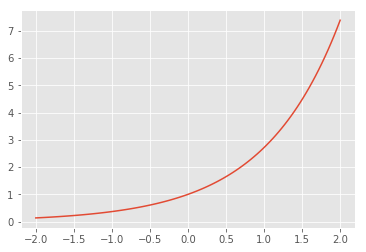

In [143]:
x = np.linspace(-2, 2, 100)
y = np.exp(x)
plt.plot(x, y)

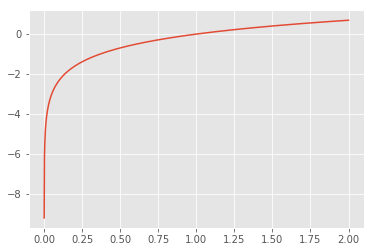

In [144]:
x = np.linspace(0.0001, 2, 1000)
y = np.log(x)
plt.plot(x, y)

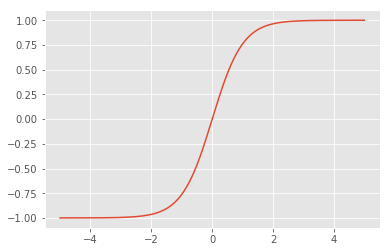

In [145]:
x = np.linspace(-5, 5, 1000)
y = (np.exp(x) - np.exp(-x)) / (np.exp(x) + np.exp(-x))
plt.plot(x, y)

# Aggregations: Sum, Min, Max

## Summing the Values in an Array

Given an array

In [146]:
a = np.random.randn(5)
a

array([ 1.01743788,  0.54470668, -0.43910337,  0.03013392, -0.85365652])

We can use the sum function of python or use the method of numpy as follow

In [147]:
sum(a) == a.sum()

True

It is recommended to use the numpy version, because it is computed much more quickly 

In [149]:
big_array = np.random.randn(1000000)
%time sum(big_array) 
%time big_array.sum()

CPU times: user 113 ms, sys: 524 µs, total: 114 ms
Wall time: 115 ms
CPU times: user 1.47 ms, sys: 183 µs, total: 1.65 ms
Wall time: 933 µs


-886.9525346529196

**Note:** `%time` is [Magic Function](http://ipython.org/ipython-doc/dev/interactive/tutorial.html#magic-functions)

## Min and Max

Again, Python has built in mix and max function. However, numpy version is better.

In [151]:
a = np.random.randn(5)
a

array([-2.25973695, -0.43810599, -0.91390506,  0.34096299,  0.97149   ])

In [152]:
a.min()

-2.259736953081827

In [153]:
a.max()

0.9714899978542867

## Multi dimensional aggregates

When we have two (or more) dimensionals array, we can choose which dimension to perform aggregration.

In [154]:
a = np.random.randn(3, 4)
a

array([[-0.61204679,  0.60160071,  0.82083333, -0.10516024],
       [ 0.02397509, -2.40769292, -0.23009075,  0.41557078],
       [-0.7135044 , -0.09816948,  0.56237145,  0.28640416]])

In [155]:
print(a.sum()) # sum all of the elements
print(a.sum(axis = 0)) # sum on column
print(a.sum(axis = 1)) # sum on row

-1.4559090664373158
[-1.30157609 -1.90426169  1.15311402  0.59681469]
[ 0.70522701 -2.1982378   0.03710173]


In [156]:
print(a.min())
print(a.min(axis = 0)) #column
print(a.min(axis = 1)) #row

-2.407692920862347
[-0.7135044  -2.40769292 -0.23009075 -0.10516024]
[-0.61204679 -2.40769292 -0.7135044 ]


In [157]:
print(a.max())
print(a.max(axis = 0))
print(a.max(axis = 1))

0.8208333272277937
[0.02397509 0.60160071 0.82083333 0.41557078]
[0.82083333 0.41557078 0.56237145]


## Sorting

To return a sorted version of the array without modifying the input, you can use *np.sort*

In [158]:
a = np.random.randn(5)
a

array([ 0.62139063, -1.55899793, -2.32286172, -0.31850252, -0.46897465])

In [159]:
# numpy.sort(a, axis=-1, kind='quicksort', order=None)
# Return a sorted copy of an array
np.sort(a)

array([-2.32286172, -1.55899793, -0.46897465, -0.31850252,  0.62139063])

To sort the array in-place, calling the **`sort`** method on the array

In [162]:
a = np.random.randn(5)
a.sort()
a

array([-0.47499848,  0.36503168,  0.515821  ,  0.81339685,  1.72265535])

A related function is **`argsort`**, which instead returns the indices of the sorted elements:

In [163]:
a = np.random.randn(5)
a

array([ 1.25862059, -1.75984061, -1.07712199,  2.2747318 , -0.23916587])

In [169]:
# numpy.argsort(a, axis=-1, kind='quicksort', order=None)
# Returns the indices that would sort an array.
np.argsort(a)

array([1, 2, 4, 0, 3])

In [165]:
a[np.argsort(a)]

array([-1.75984061, -1.07712199, -0.23916587,  1.25862059,  2.2747318 ])

In [166]:
np.argmin(a)

1

In [167]:
a

array([ 1.25862059, -1.75984061, -1.07712199,  2.2747318 , -0.23916587])

In [168]:
a.dtype

dtype('float64')

## Sorting along rows or columns

A useful feature of NumPy's sorting algorithms is the ability to sort along specific rows or columns of a multidimensional array using the axis argument. For example:

In [170]:
a = np.random.randint(0, 9, (4, 5))
a

array([[1, 1, 8, 1, 4],
       [6, 8, 0, 5, 3],
       [3, 3, 0, 0, 3],
       [1, 6, 5, 6, 8]])

In [171]:
np.sort(a, axis=0)

array([[1, 1, 0, 0, 3],
       [1, 3, 0, 1, 3],
       [3, 6, 5, 5, 4],
       [6, 8, 8, 6, 8]])

In [172]:
np.sort(a, axis=1)

array([[1, 1, 1, 4, 8],
       [0, 3, 5, 6, 8],
       [0, 0, 3, 3, 3],
       [1, 5, 6, 6, 8]])

In [173]:
np.sort(a)

array([[1, 1, 1, 4, 8],
       [0, 3, 5, 6, 8],
       [0, 0, 3, 3, 3],
       [1, 5, 6, 6, 8]])

# Homework
1. Given a 1D array, negate all elements which are between 3 and 8, in place (not created a new array).
2. Create random vector of size 10 and replace the maximum value by 0
3. How to find common values between two arrays?
4. Reverse a vector (first element becomes last)
5. Create a 3x3 matrix with values ranging from 0 to 8
6. Find indices of non-zero elements from the array [1,2,0,0,4,0]
7. Create a 3x3x3 array with random values
8. Create a random vector of size 30 and find the mean value
9. Create a 2d array with 1 on the border and 0 inside
10. Given an array x of 20 integers in the range (0, 100)
```python
x = np.random.randint(0, 100, 20)
```
and an random float in the range (0, 20)
```python
y = np.random.uniform(0, 20)
```
Find the index of x where the value at that index is closest to y. 